SurveyMedley behavioral data check
==========================================

Some subjects from SurveyMedley dataset had 'junk' responses for some survey quesions. 
I this notebook I've performed few checks to identify problematic questions in the survey.

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
survey = read_csv('/home/finc/Dropbox/Projects/SelfReg/data/behavioral/surveyMedley_data_all_subjects_tidy.csv')

Parsed with column specification:
cols(
  subject = col_character(),
  survey = col_character(),
  item_coding = col_character(),
  item_text = col_character(),
  trial_type = col_character(),
  coded_response = col_double(),
  response_time = col_double(),
  junk = col_character()
)


In [4]:
total_subjects <- survey %>%
    distinct(subject) %>%
    tally

total_subjects

n
105


In [7]:
survey %>% select (survey, item_text, trial_type)

survey,item_text,trial_type
brief,Pleasure and fun sometimes keep me from getting work done.,Q17
upps,"Sometimes when I feel bad, I can't seem to stop what I am doing even though it is making me feel worse.",Q32
brief,I am good at resisting temptation.,Q09
grit,New ideas and projects sometimes distract me from previous ones.,Q01
future_time,There are only limited possibilities in my future.,Q30
brief,I refuse things that are bad for me.,Q14
grit,I have difficulty maintaining my focus on projects that take more than a few months to complete.,Q06
future_time,I could do anything I want in the future.,Q27
brief,People would say that I have iron self-discipline.,Q16
upps,I tend to act without thinking when I am really excited.,Q37


Sorting quesions by the number of 'junk' (no answer) trials
-----------------------------------------------------------------

In [5]:
survey %>% 
    filter(junk == 'True') %>% 
    group_by(item_text, survey, event_type) %>%
    tally() %>% 
    arrange(desc(n))

ERROR: Error in grouped_df_impl(data, unname(vars), drop): Column `event_type` is unknown


Sorting surveys by the number of 'junk' (no answer) trials
-----------------------------------------------------------------

In [31]:
survey %>% 
    filter(junk == 'True') %>% 
    group_by(survey) %>%
    tally() %>% 
    arrange(desc(n))

survey,n
impulsive_venture,72
upps,39
brief,10
grit,9
future_time,5


Proportion of 'junk' trails depending of the survey type
-----------------------------------------------------------------

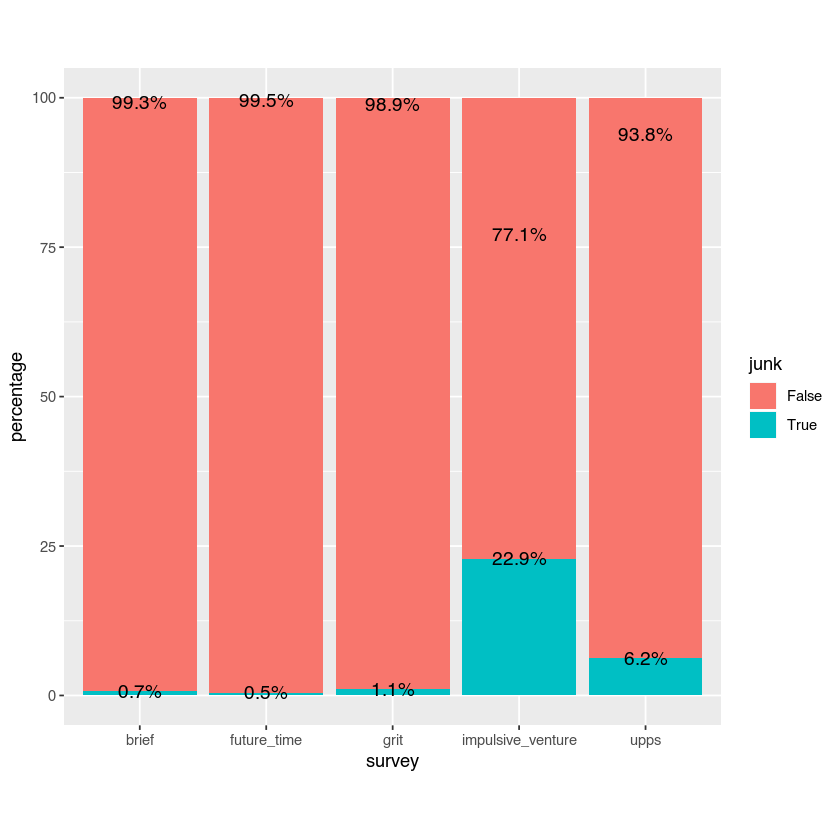

In [32]:
df <- survey %>% 
    mutate(text_char = nchar(item_text)) %>%
    group_by(survey) %>%
    mutate(total_count = n()) %>%
    group_by(survey, junk, total_count) %>%
    tally() %>% 
    mutate(percentage = (n/total_count)*100)

df %>% 
    ggplot()+
    geom_bar(aes(x = survey, y = percentage, fill = junk),  stat = "identity") +
    geom_text(aes(x = survey, y = percentage,label = paste0(round(percentage, digits = 1),"%")), size=4) + 
    theme(aspect.ratio = 1)

Number of subjects with 'junk' trials
-----------------------------------------------------------------

In [33]:
survey %>%
    filter(junk == 'True') %>%
    distinct(subject) %>%
    tally()

n
49


Number of subjects with 'junk' trials after excluding 'impulsive_venture' and 'upps' surveys
-----------------------------------------------------------------

In [34]:
survey %>%
    filter(!(survey %in% c('impulsive_venture', 'upps'))) %>% 
    filter(junk == 'True') %>%
    distinct(subject) %>%
    tally()

n
11


Getting proportion of 'junk' trials depending on number in a question
--------------------------------------------------------------------

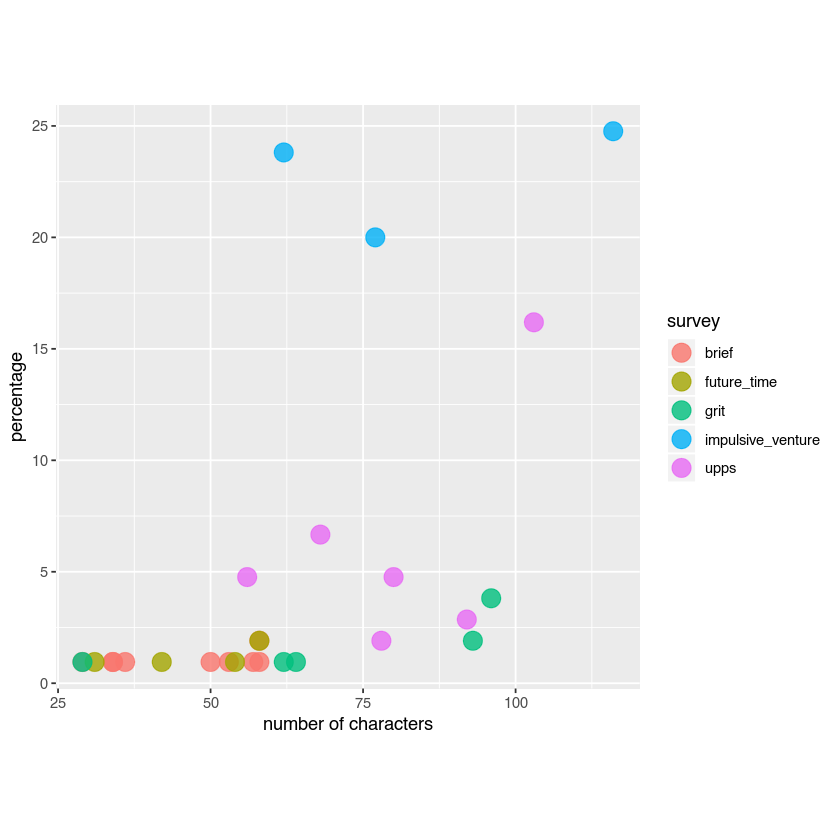

In [35]:
df_quest <- survey %>% 
    mutate(text_char = nchar(item_text)) %>%
    group_by(survey) %>%
    mutate(total_count = n()) %>%
    ungroup() %>%
    mutate(quest_count = 105) %>%
    group_by(survey, item_text, junk, total_count, text_char, quest_count) %>%
    tally() %>% 
    mutate(percentage = (n/quest_count)*100)

df_quest %>% 
    filter(junk == 'True') %>%
    arrange(percentage) %>%
    ggplot(aes(x = text_char, y = percentage)) +
    geom_point(aes(col = survey), size = 5, alpha = 0.8) + 
    xlab('number of characters') +
    theme(aspect.ratio = 1)